# ANÁLISIS DE DATOS

# 1. Generar Datos Ficticios

Primero, generaremos un conjunto de datos ficticios.

In [1]:
import pandas as pd
import numpy as np

# Generar datos ficticios
np.random.seed(0)
fechas = pd.date_range(start='2022-01-01', periods=200, freq='D')
categorias = ['Comida para Perros', 'Comida para Gatos', 'Comida para Aves', 'Comida para Peces']
data = {
    'Fecha': np.random.choice(fechas, 1000),
    'Categoria': np.random.choice(categorias, 1000),
    'Ventas': np.random.randint(100, 1000, 1000),
    'Ingresos': np.random.uniform(1000, 10000, 1000),
    'Promociones': np.random.randint(0, 20, 1000),
    'Descuento': np.random.uniform(0, 0.3, 1000)
}

df = pd.DataFrame(data)


In [9]:
# Guardar la data
df.to_csv('datos_ventas.csv', index=False)

## 2. Análisis Descriptivo

Realizaremos un análisis descriptivo de los datos.

In [10]:
# Estadísticas descriptivas
desc_stats = df.describe()
print(desc_stats)


                            Fecha       Ventas     Ingresos  Promociones  \
count                        1000  1000.000000  1000.000000  1000.000000   
mean   2022-04-12 09:47:31.200000   536.747000  5549.576778     9.145000   
min           2022-01-01 00:00:00   100.000000  1001.680425     0.000000   
25%           2022-02-23 00:00:00   300.000000  3310.944888     4.000000   
50%           2022-04-13 00:00:00   531.500000  5512.213147     9.000000   
75%           2022-05-30 00:00:00   762.000000  7825.842187    14.000000   
max           2022-07-19 00:00:00   999.000000  9992.872002    19.000000   
std                           NaN   266.333705  2586.200645     5.792714   

         Descuento  
count  1000.000000  
mean      0.143675  
min       0.000022  
25%       0.068575  
50%       0.142516  
75%       0.215175  
max       0.298720  
std       0.084841  


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        1000 non-null   datetime64[ns]
 1   Categoria    1000 non-null   object        
 2   Ventas       1000 non-null   int64         
 3   Ingresos     1000 non-null   float64       
 4   Promociones  1000 non-null   int64         
 5   Descuento    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 47.0+ KB
None

Resumen estadístico:
                            Fecha       Ventas     Ingresos  Promociones  \
count                        1000  1000.000000  1000.000000  1000.000000   
mean   2022-04-12 09:47:31.200000   536.747000  5549.576778     9.145000   
min           2022-01-01 00:00:00   100.000000  1001.680425     0.000000   
25%           2022-02-23 00:00:00   300.000000  3310.9448

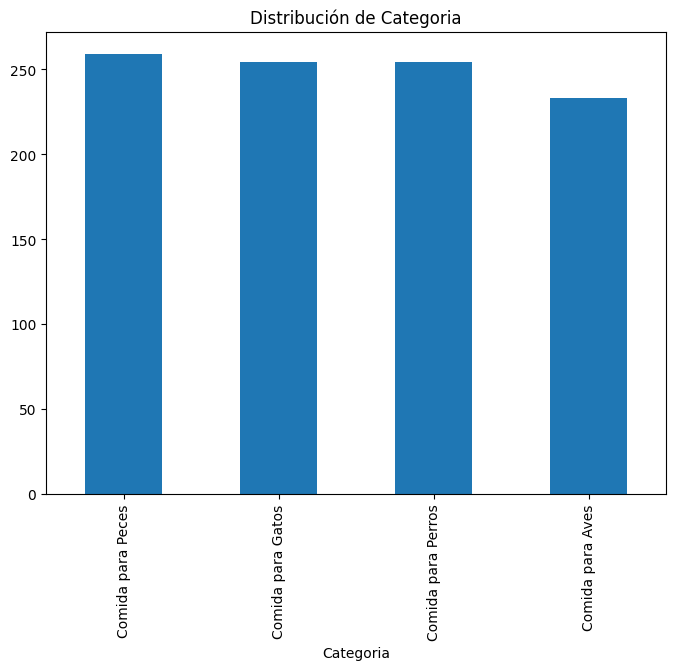


Distribución de variables numéricas:
Distribución de Fecha:


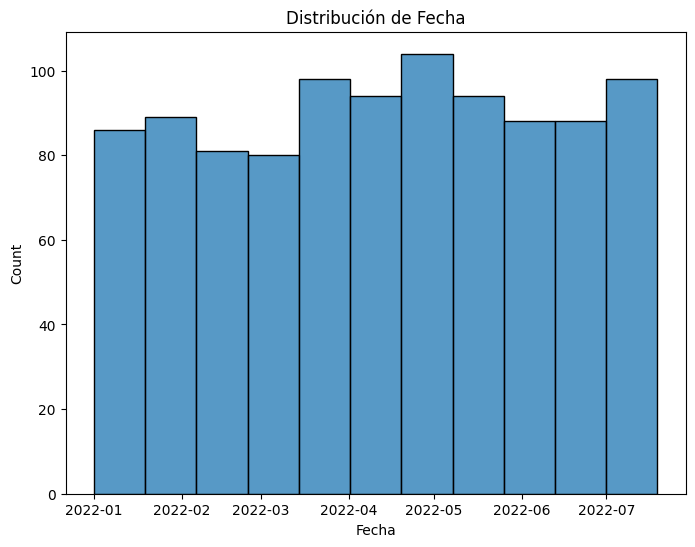

Distribución de Ventas:


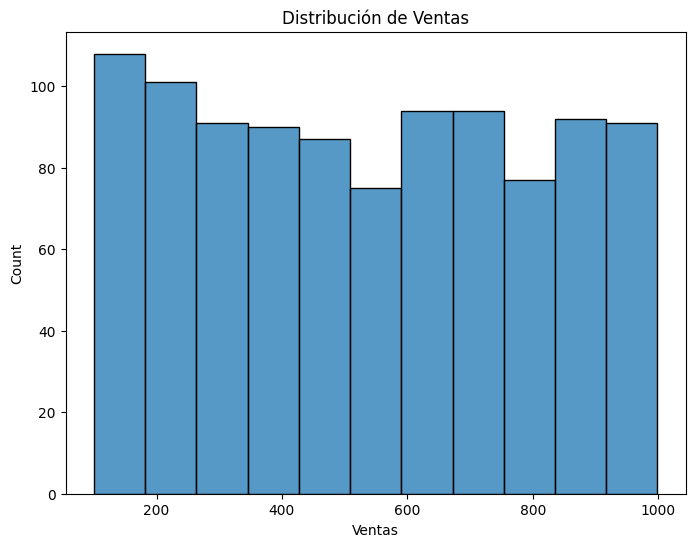

Distribución de Ingresos:


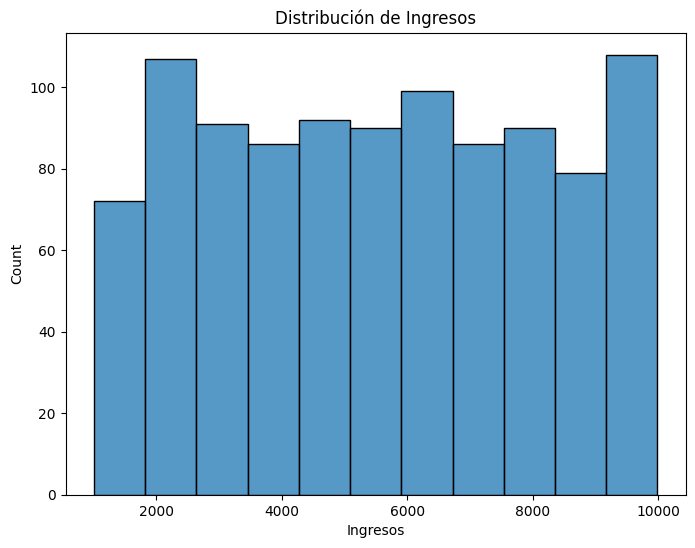

Distribución de Promociones:


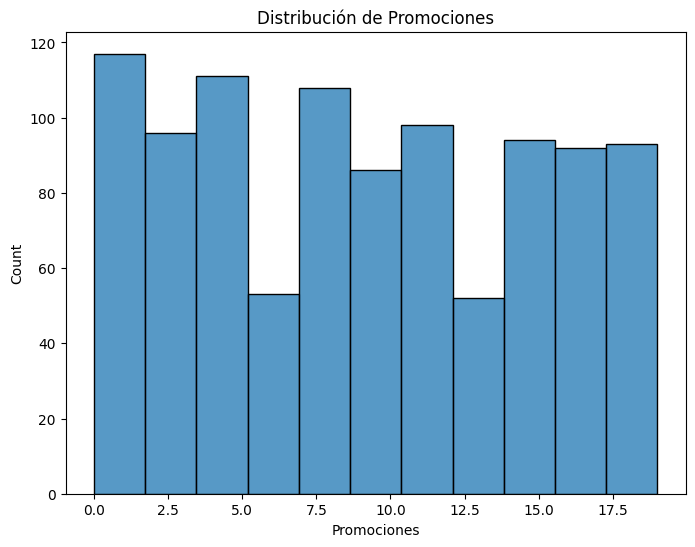

Distribución de Descuento:


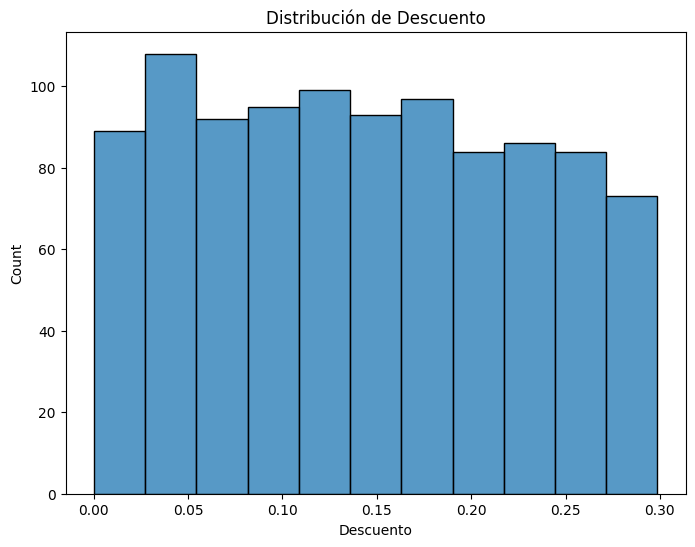

In [11]:
# Realizar el anàlisis descriptivo de cada variable utilice librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Información general del dataset:')
# 'data' is a dictionary, not a DataFrame. Use df.info()
print(df.info())

print('\nResumen estadístico:')
# Same as above, use df.describe()
print(df.describe())

print('\nDistribución de variables categóricas:')
for col in df.select_dtypes(include='object').columns:
    print(f'Distribución de {col}:') # Indent this line
    print(df[col].value_counts()) # Indent this line
    plt.figure(figsize=(8,6)) # Indent this line
    df[col].value_counts().plot(kind='bar') # Indent this line
    plt.title(f'Distribución de {col}') # Indent this line
    plt.show() # Indent this line

print('\nDistribución de variables numéricas:')
for col in df.select_dtypes(exclude='object').columns:
    print(f'Distribución de {col}:') # Indent this line
    plt.figure(figsize=(8,6)) # Indent this line
    sns.histplot(df[col]) # Indent this line
    plt.title(f'Distribución de {col}') # Indent this line
    plt.show() # Indent this line

In [35]:
plt.savefig('Distribucion_de_fecha.png')


<Figure size 640x480 with 0 Axes>

In [36]:
plt.savefig('distribucion_categoria.png')


<Figure size 640x480 with 0 Axes>

In [37]:
plt.savefig('distribucion_ventas.png')


<Figure size 640x480 with 0 Axes>

In [38]:
plt.savefig('distribucion_ingresos.png')


<Figure size 640x480 with 0 Axes>

In [39]:
plt.savefig('distribucion_promociones.png')


<Figure size 640x480 with 0 Axes>

In [40]:
plt.savefig('Distribucion_descuento.png')


<Figure size 640x480 with 0 Axes>

## 3. Análisis Predictivo

Utilizaremos un modelo de regresión lineal para predecir las ventas.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = df[['Ingresos', 'Promociones', 'Descuento']]
y = df['Ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
predicciones = model.predict(X_test)

#Representar de manera Gràfica

## 4. Análisis de Series Temporales

Realizaremos un análisis de series temporales con un gráfico.

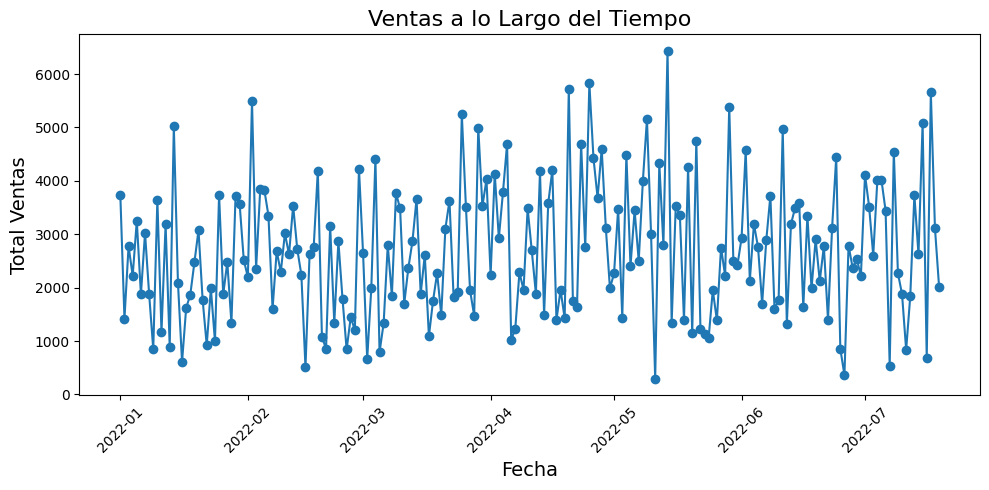

In [22]:
import matplotlib.pyplot as plt

# Ventas por fecha
ventas_fecha = df.groupby('Fecha').agg({'Ventas': 'sum'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(ventas_fecha['Fecha'], ventas_fecha['Ventas'], marker='o')
plt.title("Ventas a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Total Ventas", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('serie_temporal.png')
plt.show()



## 5. Segmentación de Datos
Realizaremos la segmentación de los datos.

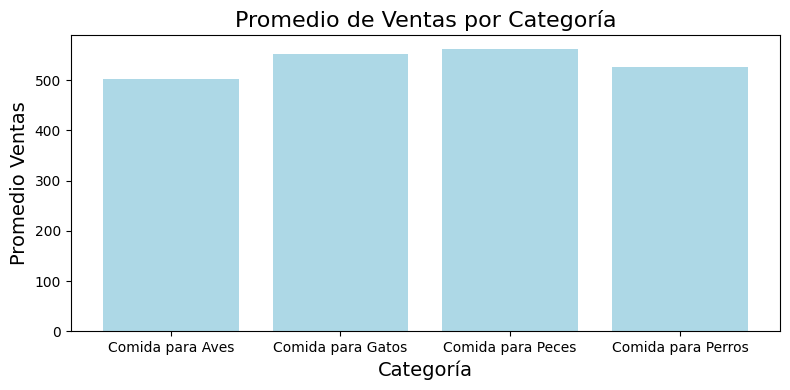

In [25]:
segmentos = df.groupby('Categoria').agg({'Ventas': 'mean'}).reset_index()

plt.figure(figsize=(8, 4))
plt.bar(segmentos['Categoria'], segmentos['Ventas'], color='lightblue')
plt.title("Promedio de Ventas por Categoría", fontsize=16)
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Promedio Ventas", fontsize=14)
plt.tight_layout()
plt.savefig('segmentos.png')
plt.show()


## 6. Optimización y Modelo de Decisiones

Realizaremos una optimización simple usando scipy.

In [15]:
from scipy.optimize import linprog

# Definir coeficientes de la función objetivo (negativa para maximizar)
c = [-20, -15]  # Ejemplo de coeficientes
A = [[1, 1], [20, 15]]
b = [40, 500]

# Realizar la optimización
res = linprog(c, A_ub=A, b_ub=b)
print("Resultados de la optimización:", res)


Resultados de la optimización:         message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -500.00000000000006
              x: [ 0.000e+00  3.333e+01]
            nit: 1
          lower:  residual: [ 0.000e+00  3.333e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 6.667e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


## 7. Crear la Presentación Ejecutiva

Finalmente, crearemos la presentación en PowerPoint.

In [17]:
pip install python-pptx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 15.7 MB/s eta 0:00:00


In [26]:
from pptx import Presentation
from pptx.util import Inches

# Crear presentación
prs = Presentation()

# Función para agregar un título y un subtítulo
def add_title_slide(title, subtitle):
    slide = prs.slides.add_slide(prs.slide_layouts[0])
    slide.shapes.title.text = title
    slide.placeholders[1].text = subtitle

# Diapositiva de título
add_title_slide("Análisis de Ventas de Comida para Mascotas", "Análisis completo de datos y resultados")

# Estadísticas Descriptivas
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Estadísticas Descriptivas"
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = desc_stats.to_string()

# Gráfico de ventas por categoría
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Promedio de Ventas por Categoría"
slide.shapes.add_picture("/content/segmentos.png", Inches(0.5), Inches(1), width=Inches(8))

# Análisis de Series Temporales
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Ventas a lo Largo del Tiempo"
slide.shapes.add_picture("/content/serie_temporal.png", Inches(0.5), Inches(1), width=Inches(8))

# Resultados de Optimización
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Resultados de Optimización"
optimization_result = f"Comida para Perros: {res.x[0]:.2f}\nComida para Gatos: {res.x[1]:.2f}\nGanancia Total: {-res.fun:.2f}"
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = optimization_result

# Conclusiones
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Conclusiones Finales"
conclusiones = (
    "1. Identificamos las categorías más vendidas y sus tendencias.\n"
    "2. El modelo predictivo proporciona información valiosa sobre ventas.\n"
    "3. Las promociones tienen un impacto significativo en las ventas.\n"
    "4. La optimización sugiere cantidades óptimas para maximizar ganancias."
)
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = conclusiones

# Guardar la presentación
prs.save("Analisis_Ventas_Pets_Completo.pptx")


In [ ]:
#Crear la presentaciòn de los datos con Power Bi

In [28]:
pip install powerbiclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.9/684.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=7a6e5d6f9093b2dd5a703dcd1595b90a53b0d55f950a05eff738d4e236087b22
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [31]:
pip install --upgrade powerbiclient


In [ ]:
from powerbiclient import Report, models

from powerbiclient.authentication import DeviceCodeLogin


device_auth = DeviceCodeLogin()

creds = device_auth.login()

In [ ]:

dataset = models.Dataset(name="My Dataset")
table = models.Table(name="Sales Data", columns=[
    models.Column(name="Fecha", data_type="dateTime"),
    models.Column(name="Categoria", data_type="string"),
    models.Column(name="Ventas", data_type="int"),

])
dataset.tables.append(table)


report = Report(group_id="YOUR_GROUP_ID", dataset_id="YOUR_DATASET_ID")



report.publish()

In [41]:
from IPython.display import HTML
